# Drifter L2 Data Exploration
- show the spatial repartition of the drifters and identify clusters
- plot observations spatial density
- look at the drifters temporal resolution (for each cluster ?)

In [1]:
import os
from glob import glob

import cartopy.geodesic as geod
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.geodesic import Geodesic

import numpy as np
import xarray as xr
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

path_save_plot = './save_plots/save_plots_2024-06-12_DrifterL2DataExploration/'

In [2]:
drifters_directory = '/home/bouxdecl/Documents/data/all_drifters_sharing'

#### Meta-Data

In [3]:
meta = xr.open_dataset(os.path.join(drifters_directory, 'yaml_metadata.nc')) 
meta

<xarray.Dataset>
Dimensions:     (id: 127)
Coordinates:
  * id          (id) <U15 '0-4351296' '0-4351902' '0-4351906' ... '15' '17' '18'
Data variables:
    platform    (id) <U15 ...
    start_time  (id) datetime64[ns] ...
    start_lon   (id) float64 ...
    start_lat   (id) float64 ...
    end_time    (id) datetime64[ns] ...
    end_lon     (id) float64 ...
    end_lat     (id) float64 ...
    end_reason  (id) <U10 ...

## Data selection

In [4]:
data_dir = '/home/bouxdecl/Documents/data/all_drifters_sharing'
L2_dir = drifters_directory + '/L2'

filename convention: L2_type_source_rawsampling_method_smoothedsampling_version.nc

In [5]:
def file_selection_mediterranean(files):
    # only mediterranean (not containing 'uwa') 

    selected_files = []
    for file in files:
         if not file.count("uwa"):
            selected_files.append(file)
    return selected_files

def file_selection_by_method(files, method: str):
    # files from one interpolation method: 'variationnal' or 'lowess'

    selected_files = []
    for file in files:
         if file.count(method):
            selected_files.append(file)
    return selected_files

def file_selection_by_sampling(files, sampling: str):
    # files from one smooth L2 sampling: '10min', '30min', '1h' at the end of the file_name

    selected_files = []
    for file in files:
         if file[-11:].count(sampling):
            selected_files.append(file)
    return selected_files


In [6]:
mediterranea_files = file_selection_mediterranean(os.listdir(L2_dir))

file_lowess_10min = file_selection_by_method(mediterranea_files, "lowess")
file_lowess_10min = file_selection_by_sampling(file_lowess_10min, "10min")

file_lowess_30min = file_selection_by_method(mediterranea_files, "lowess")
file_lowess_30min = file_selection_by_sampling(file_lowess_30min, "30min")

file_lowess_1h = file_selection_by_method(mediterranea_files, "lowess")
file_lowess_1h = file_selection_by_sampling(file_lowess_1h, "1h")


## Spaghetti plot

#### example of netcdf file :

In [6]:
f = mediterranea_files[0]
ds = xr.open_dataset(os.path.join(L2_dir, f))

ds

<xarray.Dataset>
Dimensions:     (id: 8, time: 3727)
Coordinates:
  * id          (id) <U15 '300534061395960' ... '300534064300510'
  * time        (time) datetime64[ns] 2023-05-04T20:10:00 ... 2023-05-30T17:1...
Data variables: (12/26)
    u           (id, time) float64 ...
    v           (id, time) float64 ...
    x           (id, time) float64 ...
    y           (id, time) float64 ...
    platform    (id) <U14 ...
    lonc        (id) float64 ...
    ...          ...
    start_lon   (id) float64 ...
    start_lat   (id) float64 ...
    end_time    (id) datetime64[ns] ...
    end_lon     (id) float64 ...
    end_lat     (id) float64 ...
    end_reason  (id) <U10 ...
Attributes: (12/15)
    drifter_type:                    SVP
    laboratory:                      SCRIPPS
    campaign:                        BIOSWOT
    campaign_doi:                    https://doi.org/10.17600/18002392
    raw_download_max_date:           2023-05-30 17:10:00
    contact:                         margot.demol@ifremer.fr
    ...                              ...
    geographical_projection:         Asimuthal Equidistant projection centere...
    geographical_projection_pyproj:  pyproj.Proj(proj="aeqd", lat_0=latc, lon...
    smoothing_method:                LOWESS
    smoothing_method_param_dict:     {'degree': 2, 'iteration': 3, 'T_low_pas...
    interpolation_sampling:          10min
    nominal_raw_sampling:            10min

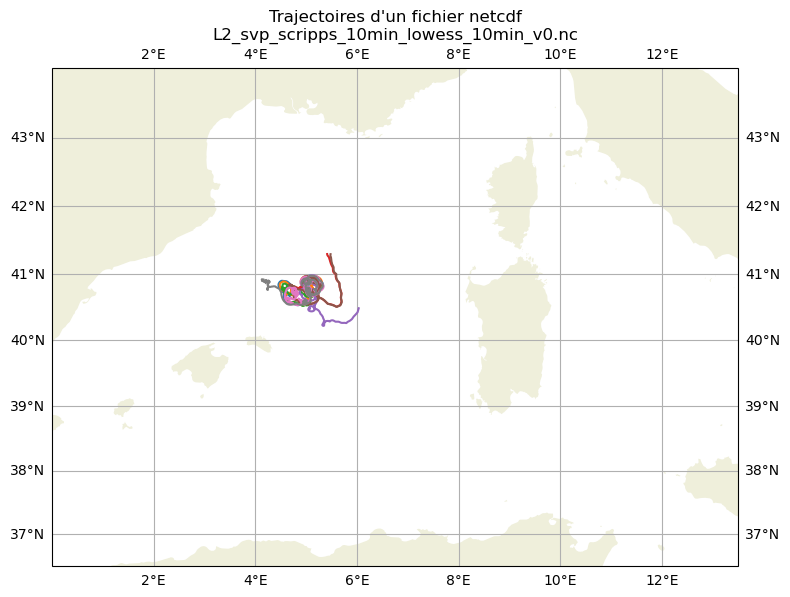

In [7]:
fig = plt.figure(tight_layout=True, figsize=(8, 8))
crs = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
gl = ax.gridlines(draw_labels=True,)

ax.add_feature(cfeature.LAND,)
bbox = [0,13.5, 36.5,44]
ax.set_extent(bbox)
ax.set_title("Trajectoires d'un fichier netcdf\n{}".format(f))

for i in range(ds.sizes['id']):
    ax.plot(ds.isel(id=i).lon, ds.isel(id=i).lat,transform=crs, label=str(i))

#### global mediterranean trajectory plot :

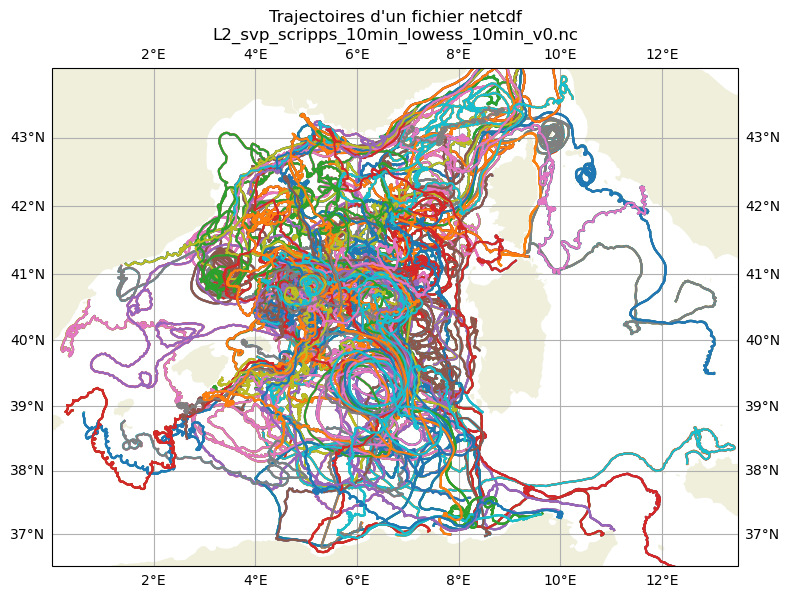

In [5]:
fig = plt.figure(tight_layout=True, figsize=(8, 8))
crs = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
gl = ax.gridlines(draw_labels=True,)

ax.add_feature(cfeature.LAND,)
bbox = [0,13.5, 36.5,44]
ax.set_extent(bbox)

for file in mediterranea_files:
    ds = xr.open_dataset(os.path.join(L2_dir, file))
    for i in range(ds.sizes['id']):
        ax.plot(ds.isel(id=i).lon, ds.isel(id=i).lat,transform=crs, label=str(i))

### SAVE
ax.set_title("All mediterranean trajectories")
save_name = 'all_mediterranean_trajectories.png'
plt.savefig(path_save_plot+save_name, bbox_inches='tight', dpi = 300)

## Observation spatial density

#### one drifter

In [26]:
f = mediterranea_files[0]
ds = xr.open_dataset(os.path.join(L2_dir, f))

i=0
x, y = ds.isel(id=i).lon.values, ds.isel(id=i).lat.values


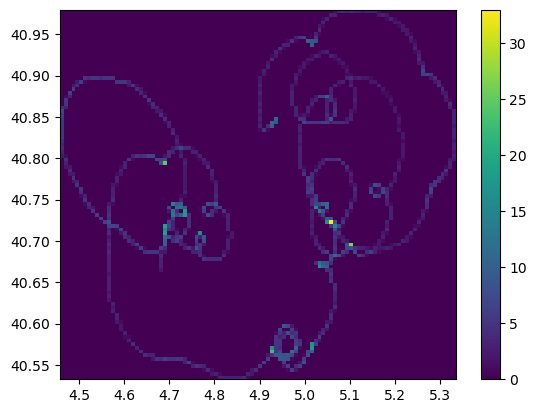

In [27]:
hist, lon_edges, lat_edges, _ = plt.hist2d(x, y, bins=100, range=None, density=False)
plt.colorbar()

#### by L2 temporal resolution

**!!! There are two temporal resolution**: L1 DATA & L2 interpolated data 

In [19]:
def get_observation_density(files, n_bins=100):
    # get 1D array for latitude and longitude over all observations
    all_lat, all_lon = np.array([]), np.array([])

    for file in files:
        ds = xr.open_dataset(os.path.join(L2_dir, file))
        x, y = ds.lat.values.flatten(), ds.lon.values.flatten()
        all_lat = np.concatenate([all_lat, x])
        all_lon = np.concatenate([all_lon, y])

    all_lat = all_lat[~np.isnan(all_lat)]
    all_lon = all_lon[~np.isnan(all_lon)]

    # histogram 2D of the observations number
    hist, lat_edges, lon_edges = np.histogram2d(all_lat, all_lon, bins=n_bins, range=None, density=False)
    
    return hist, lat_edges, lon_edges



def plot_observation_density(hist, lat_edges, lon_edges, save_name):
    # Set up the figure and map projection
    fig = plt.figure(tight_layout=True, figsize=(8, 8))
    crs = ccrs.PlateCarree()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
    _ = ax.gridlines(draw_labels=True,)

    # Add land feature for better visualization
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)

    # Set the map extent
    bbox = [0, 13.5, 36.5, 44]
    ax.set_extent(bbox, crs=crs)

    # Plot the density of points
    mesh = ax.pcolormesh(lon_edges, lat_edges, hist, transform=crs, cmap='Oranges')

    # Add a color bar to show the density scale
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('Density')

    ### SAVE
    ax.set_title(save_name)
    save_name = save_name
    plt.savefig(path_save_plot+save_name, bbox_inches='tight', dpi = 300)

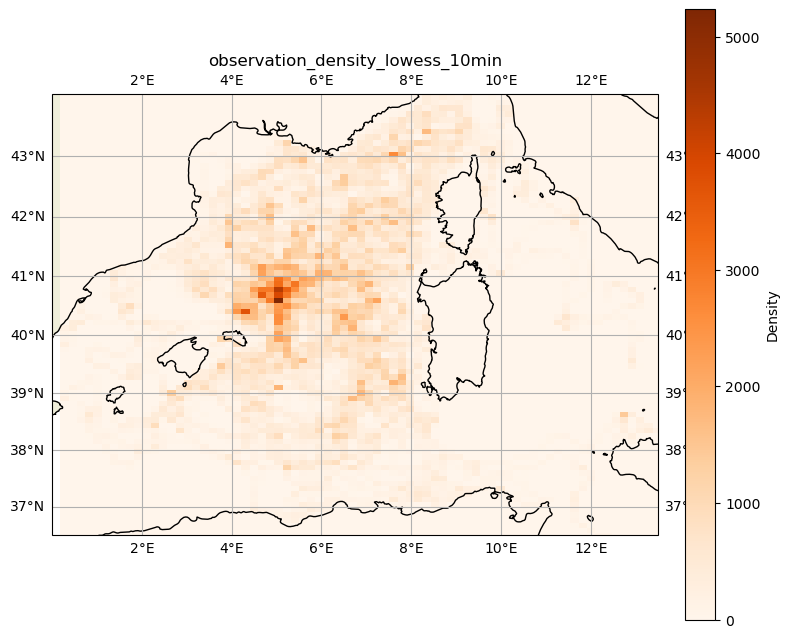

In [24]:
files = file_lowess_10min
save_name = 'observation_density_lowess_10min'
hist, lat_edges, lon_edges = get_observation_density(files, n_bins=100)
plot_observation_density(hist, lat_edges, lon_edges, save_name)

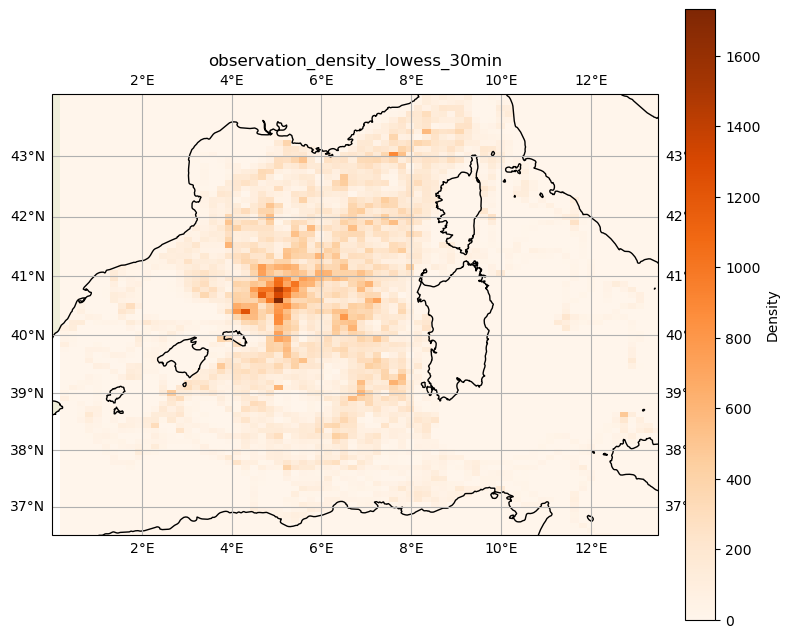

In [21]:
files = file_lowess_30min
save_name = 'observation_density_lowess_30min'
hist, lat_edges, lon_edges = get_observation_density(files, n_bins=100)
plot_observation_density(hist, lat_edges, lon_edges, save_name)

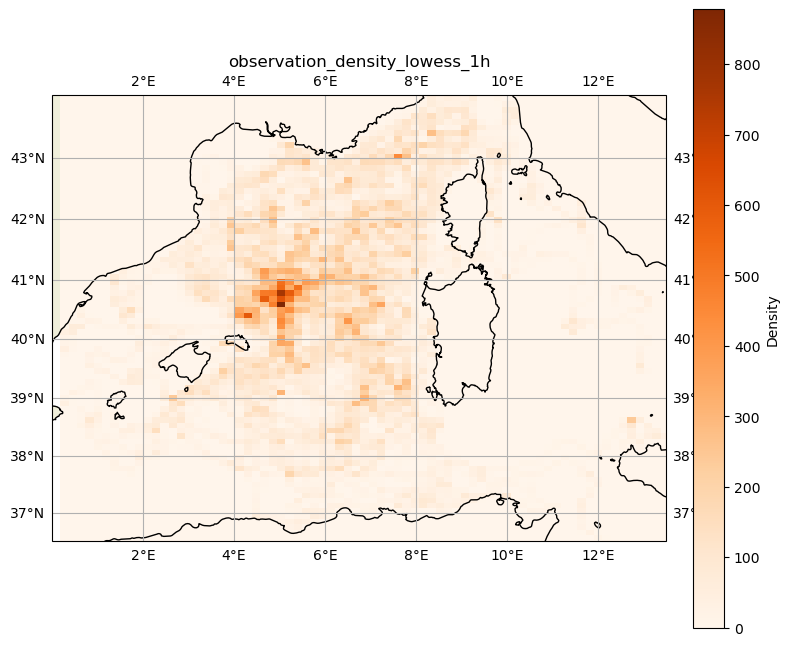

In [22]:
files = file_lowess_1h
save_name = 'observation_density_lowess_1h'
hist, lat_edges, lon_edges = get_observation_density(files, n_bins=100)
plot_observation_density(hist, lat_edges, lon_edges, save_name)

## Time repartition 

In [4]:
time_med = np.array([], dtype=np.datetime64)

for file in mediterranea_files:
    ds = xr.open_dataset(os.path.join(L2_dir, file))
    time = ds.time.values.flatten()
    time_med = np.concatenate([time_med, time])

time_med = time_med[~np.isnan(time_med)]

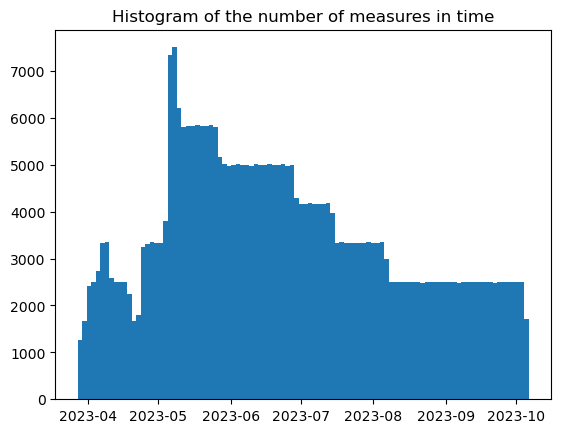

In [119]:
hist, time_edges, _ = plt.hist(time_med, bins=100)
plt.title('Histogram of the number of measures in time')
plt.show()

## plot trajectory :
**L2 linear interpolate in gaps, there an nan values just at the beginning / end**

In [20]:
file = 'L2_svp_ogs_10min_lowess_10min_v0.nc'

ds = xr.open_dataset(os.path.join(L2_dir, file))
ds_traj = ds.isel(id=0)


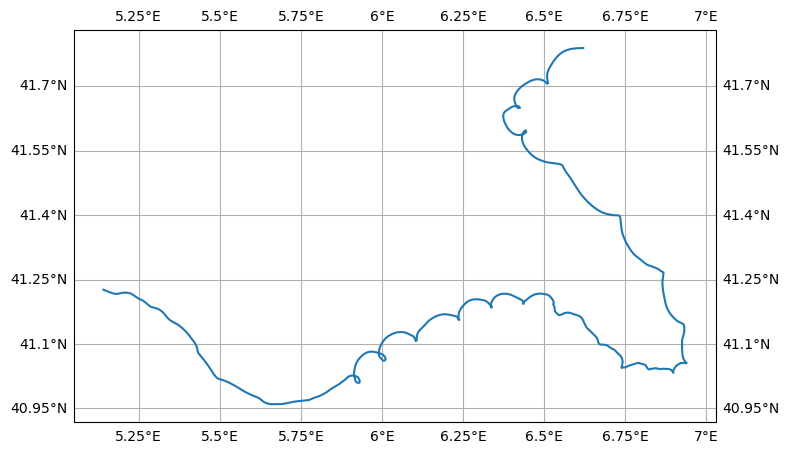

In [21]:
# Plot the trajectory with the velocity vectors

fig = plt.figure(tight_layout=True, figsize=(8, 8))
crs = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
gl = ax.gridlines(draw_labels=True,)
ax.add_feature(cfeature.LAND,)

# trajectory
ax.plot(ds_traj.lon, ds_traj.lat,transform=crs)

In [9]:
file = file_lowess_1h[10]

ds = xr.open_dataset(os.path.join(L2_dir, file))
ds_traj = ds.dropna(dim='time', how='any', subset=['u']).isel(id=0)

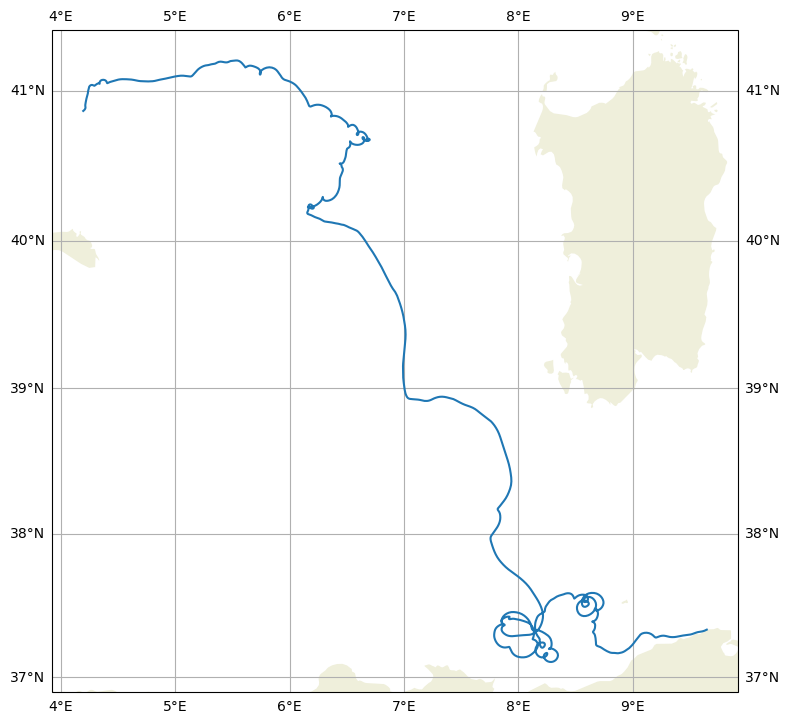

In [13]:
# Plot the trajectory with the velocity vectors

fig = plt.figure(tight_layout=True, figsize=(8, 8))
crs = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
gl = ax.gridlines(draw_labels=True,)
ax.add_feature(cfeature.LAND,)

# trajectory
ax.plot(ds_traj.lon, ds_traj.lat,transform=crs)

## Spectrum

In [18]:
file = file_lowess_1h[10]
ds = xr.open_dataset(os.path.join(L2_dir, file))

ds = ds.flatten(dim='time')

AttributeError: 'Dataset' object has no attribute 'flatten'

In [21]:


sig = ds_traj.u
t = ds_traj.time


# Compute the FFT
fft_vals = np.fft.fft(sig)
fft_freqs = np.fft.fftfreq(len(fft_vals), 600)

# Only keep the positive half of the spectrum
positive_freqs = fft_freqs[:len(fft_freqs) // 2]
positive_fft_vals = np.abs(fft_vals[:len(fft_vals) // 2])

# Plot the original signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

# Plot the Fourier Transform
plt.subplot(2, 1, 2)
plt.loglog(positive_freqs, positive_fft_vals)
plt.axvline(1/(19.5*3600), c='grey', ls='--', label='inertial frequency')
plt.title('Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()

AttributeError: 'DataArray' object has no attribute 'flatten'